# Estadistica Aplicada
## Edwin Javier Hernandez Rodriguez
### 11va Sesion 6 Mar 2023

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
rossi = load_rossi()

In [47]:
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


week: tiempo de supervivencia en semanas.

arrest: 1 si fue arrestado, 0 si no.

fin: 1 si recibió dinero cuando fue liberado, 0 si no recibió

age: edad cuando es liberado

race: 1 negro, 0 otra raza

wexp: 1 trabajo tiemo completo cuando fue arrestado, 0 si no

mar: 1 si estas casado al momento de la liberación, 0 si no

paro: libertad condicional 1, 0 si no

prio: encarcelamientos anteriores

## Para obtener las estadísticas descriptivas

In [16]:
rossi.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


57% de los liberados tenian trabajo

61% de los que liberaron fue con libertad condicional

en promedio casi todos han pisado la carcel 3 veces

### Ahora queremos las caracteristicas para los que fueron arrestados y los que no

In [48]:
rossi.groupby('arrest').describe()
# 318 no fueron arrestados y 113 si fueron arrestados

week                                    ... prio                     
        count       mean        std   min   25%  ...  min  25%  50%  75%   max
arrest                                           ...                          
0       318.0  52.000000   0.000000  52.0  52.0  ...  0.0  1.0  2.0  3.0  15.0
1       114.0  28.710526  14.447784   1.0  17.0  ...  0.0  1.0  3.0  5.0  18.0

[2 rows x 64 columns]

In [49]:
rossi.groupby('arrest')['week'].describe()
# para week

,count,mean,std,min,25%,50%,75%,max
arrest,,,,,,,,
0,318.0,52.000000,0.000000,52.0,52.0,52.0,52.0,52.0
1,114.0,28.710526,14.447784,1.0,17.0,28.0,41.5,52.0


In [50]:
rossi.groupby('arrest')['mar'].describe()
# para casados
#los que no fueron arrestados, tienen una tasa de matrimonio mas alta

,count,mean,std,min,25%,50%,75%,max
arrest,,,,,,,,
0,318.0,0.141509,0.349096,0.0,0.0,0.0,0.0,1.0
1,114.0,0.070175,0.256570,0.0,0.0,0.0,0.0,1.0


In [51]:
rossi.groupby('arrest')['prio'].describe()
# para veces en carcel
#aquellos que no fueron arrestados habían pisado 2.70 veces la carcel

,count,mean,std,min,25%,50%,75%,max
arrest,,,,,,,,
0,318.0,2.701258,2.552057,0.0,1.0,2.0,3.0,15.0
1,114.0,3.771930,3.587182,0.0,1.0,3.0,5.0,18.0


## Hipótesis
fin: i recibe ayuda (dinero) será menos probable que lo arresten (no va a tener necesidad de robar)
week: tiempo de supervivencia en semanas.

age: si es más joven es más probable que vaya a robar que si eres adulto debido a la inexperiencia y que todo se te hace facil

race:es mas probable que lo vuelvan a arrestar si es negro

wexp:menos probable si tiene tiempo completo

mar: si estas casado menos probable

paro: no, se esforzó en salir y no regresar tan facil

prio: si, chango viejo no aprende maroma nueva

In [52]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-03-06 22:23:56 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

- Signo de coeficiente nos dice si disminuye (-) o aumenta (+) el riesgo

- Del coeficiente solo tomamos el signo

- El que se va a interpretar es el exp(coef)

- Para "Age": Si (-) 1 - 0.94 = 0.06.- el promedio por cada año de edad, el riesgo de ser arrestado disminuye en 6%
- Si(t) que es "Race" (suponiendo que es significativo): exp(coef) - 1: 1.37 - 1 = 0.37, alguien que es negro en promedio tiene un 37% más riesgo de ser arrestado

<AxesSubplot:xlabel='log(HR) (95% CI)'>

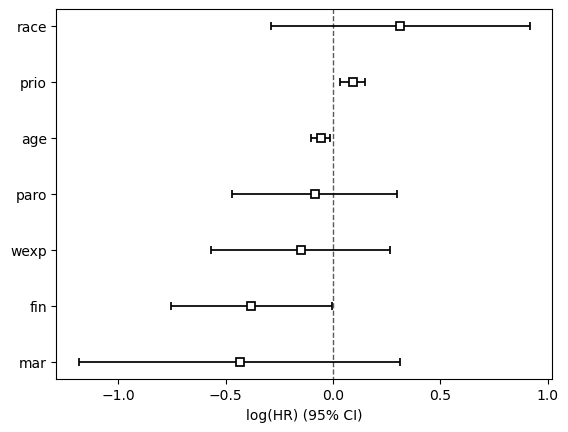

In [53]:
cph.plot()

In [55]:
df_vector=rossi_dataset.iloc[1]

NameError: name 'rossi_dataset' is not defined

In [42]:
cph.predict_survival_function(df_vector).plot()

NameError: name 'df_vector' is not defined

<AxesSubplot:>

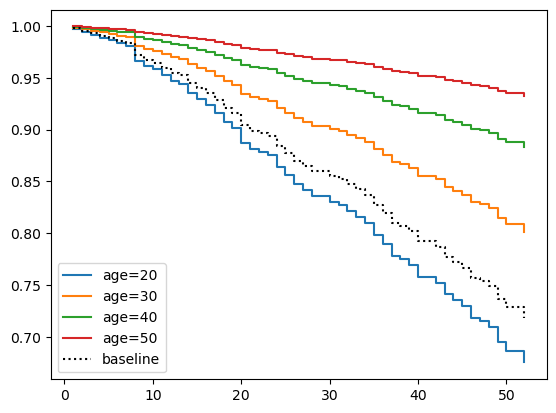

In [34]:
cph.plot_partial_effects_on_outcome(covariates='age', values=[20,30,40,50])

<AxesSubplot:>

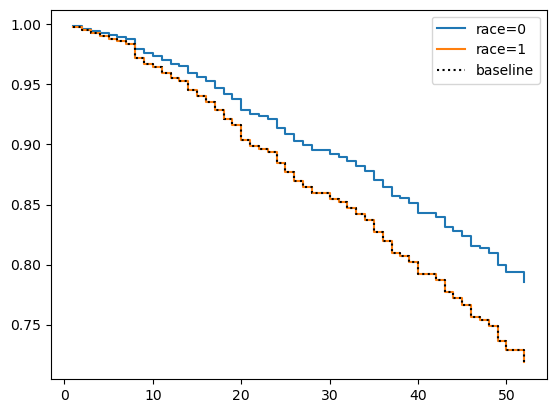

In [36]:
cph.plot_partial_effects_on_outcome(covariates='race', values=[0,1])

In [57]:
from lifelines.datasets import load_kidney_transplant
transplante = load_kidney_transplant()

In [59]:
transplante.head()

,time,death,age,black_male,white_male,black_female
0,1,0,46,0,1,0
1,5,0,51,0,1,0
2,7,1,55,0,1,0
3,9,0,57,0,1,0
4,13,0,45,0,1,0


## Modelo de Cox para hombre y mujer negro(a)

In [67]:
cph2 = CoxPHFitter()
cph2.fit(transplante, duration_col='time', event_col='death', formula= 'age + black_male + black_female')
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 863 total observations, 723 right-censored observations>
             duration col = 'time'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 863
number of events observed = 140
   partial log-likelihood = -849.82
         time fit was run = 2023-03-06 22:37:37 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
age            0.05       1.05       0.01             0.04             0.07                 1.04                 1.07
black_female   0.39       1.48       0.28            -0.16             0.95                 0.85                 2.58
black_male    -0.10       0.91       0.28            -0.65             0.46                 0.52                 1.58

               cmp to     z      p   -log2(p)
covariate                                    
age              0.00  7.11 <0.005      39.67
black_female     0.00  1.38   0.17       2.57
black_male       0.00 -0.35   0.73       0.46
---
Concordance = 0.67
Partial AIC = 1705.64
log-likelihood ratio test = 58.70 on 3 df
-log2(p) of ll-ratio test = 39.70

- La relación mas significativa es muerte ~ edad ya que su p-valor es menor a 0.005, por lo tanto es significativa.
- Ser hombre o mujer negro no afecta a como se responderá ante el transplante
- Em promedio por cada año que pasa, hay 5% de riesgo de morir despues de recibir un transplante

In [68]:
transplante.describe()

,time,death,age,black_male,white_male,black_female
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,1379.787949,0.162225,42.836616,0.106605,0.500579,0.068366
std,1009.908575,0.368871,13.515050,0.308789,0.500290,0.252520
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,426.000000,0.000000,33.000000,0.000000,0.000000,0.000000
50%,1269.000000,0.000000,43.000000,0.000000,1.000000,0.000000
75%,2216.000000,0.000000,54.000000,0.000000,1.000000,0.000000
max,3434.000000,1.000000,75.000000,1.000000,1.000000,1.000000


- El 16% de los que reciben transplante se muere, el restante o esta censurado o sobrevive
- La edad promedio de los que reciben un transplante es de 43